## РГЗ по ИИ


In [17]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


file_name = 'variant_11'
df = pd.read_csv(file_name + '.csv')
dfc = df


## Предобработка данных
### Блок удаления дублированых строк
Удаляем дублированные строки с помощью ___drop_duplicates___

In [18]:
dfc = dfc.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

### Блок удаления пропущенных данных
Удаляем пропуски данных с помощью ___dropna___

In [19]:
dfc = dfc.dropna()

### Блок удаления аномальных данных


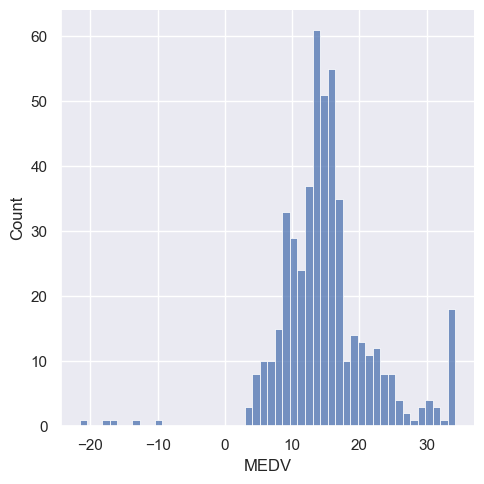

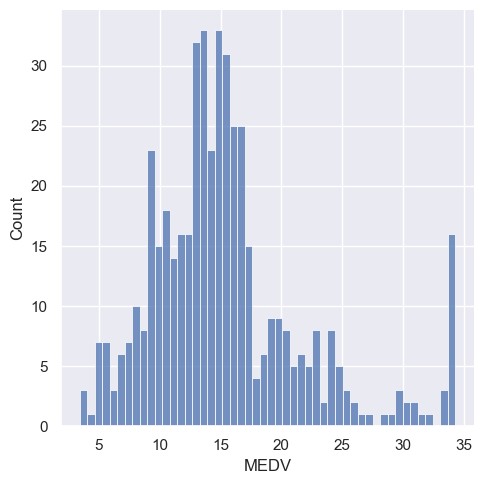

In [20]:
dfc = dfc.reset_index(drop=True)
sns.set(rc={'figure.figsize':(10,10)})
sns.displot(dfc['MEDV'], bins=50)
plt.show()
for i in range(0,len(dfc['MEDV'])):
    if dfc['MEDV'][i] < 0:
        dfc = dfc.drop([i])
dfc = dfc.reset_index(drop=True)
dfc.to_csv('clear.csv')
sns.set(rc={'figure.figsize':(10,10)})
sns.displot(dfc['MEDV'], bins=50)
plt.show()

##  Обработка данных
### Выбор корреляционных признаков
Выбираем признаки такие, чтобы корреляция с целевым значением была наибольшей по модулю и взаимная корреляция признаков была минимальна.


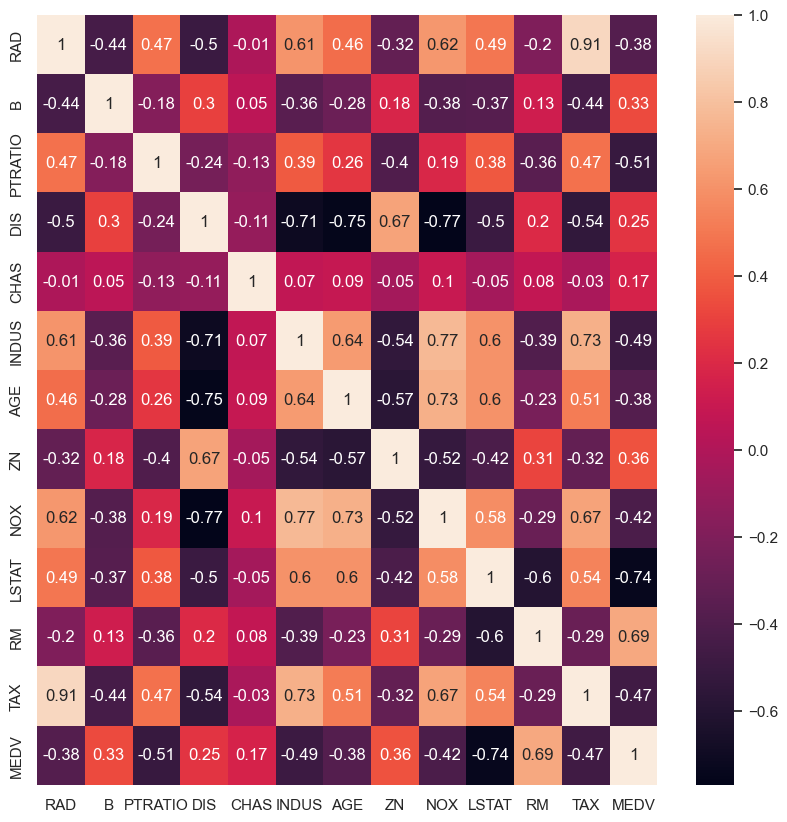

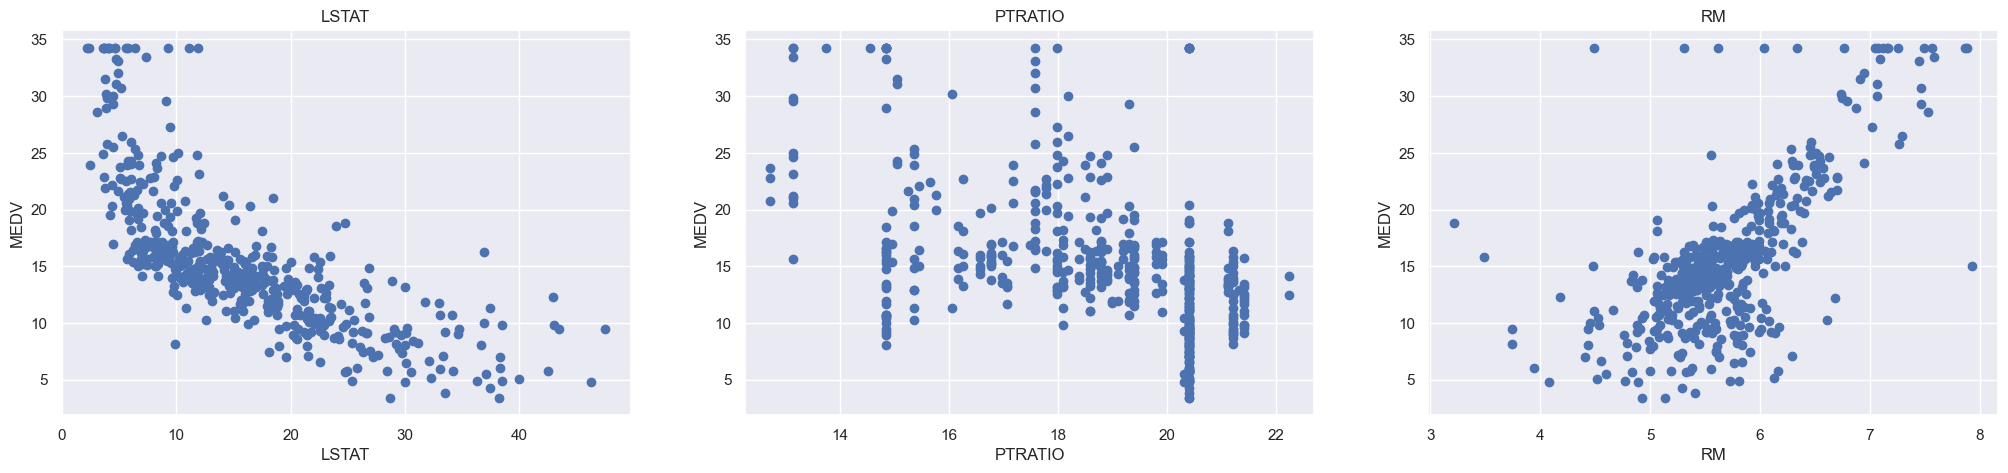

In [21]:
correlation_matrix = dfc.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.figure(figsize=(25, 5))
features = ['LSTAT','PTRATIO','RM']
target = dfc['MEDV']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = dfc[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')


### Разбиваем данные по соотношению 80/20


In [22]:
X = dfc.iloc[:,[2,3]]
# X = pd.DataFrame(np.c_[df['LSTAT'], df['PTRATIO']],df['RM'],columns = ['LSTAT','PTRATIO','RM'])
Y = dfc['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

### Блок обучения
По выборке тренировачных значений проводим аппроксимацию с помощью методо ___LinearRegression___.
По полученной зависимости определяем СКО и коэффициент детерминации. По этим данным мы оцениваем обучени, то есть насколько предсказанные данные совпадают с истинными. График должен получиться кучным и на нем должна быть видна зависимость.

Оценка модели на обучающей выборке: 
- среднеквадратическая ошибка 4.459548464094677
- коэффициент детерминации 0.5277149901066057


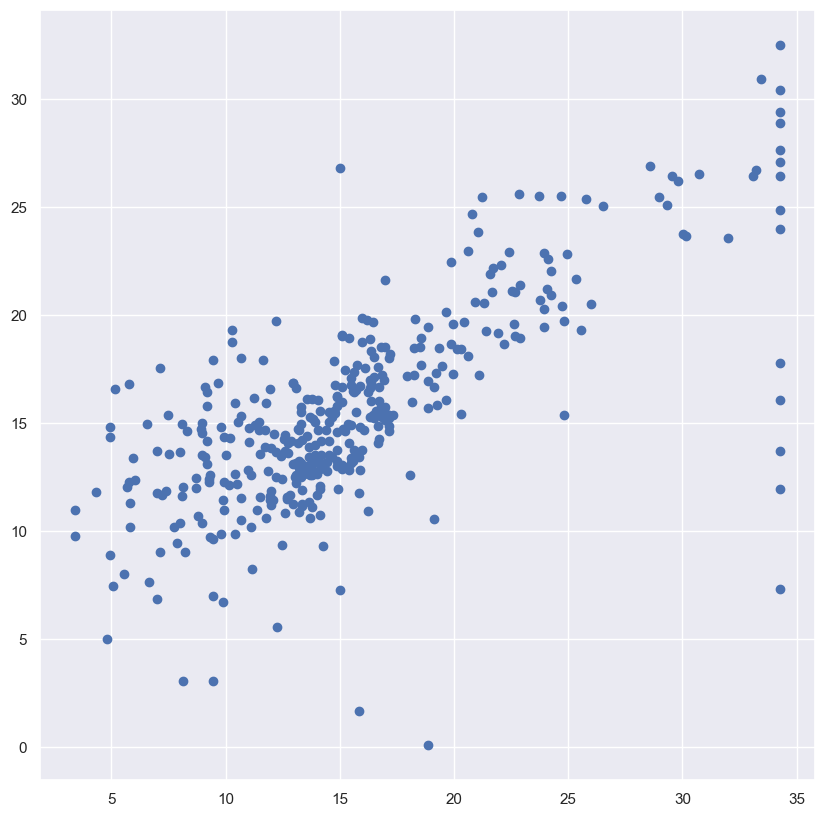

In [23]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("Оценка модели на обучающей выборке: ")
print('- среднеквадратическая ошибка {}'.format(rmse))
print('- коэффициент детерминации {}'.format(r2))
plt.scatter(Y_train, y_train_predict)
plt.show()

### Оценка обучения
То же самое повторяем для тестовой выборки.

Оценка модели на тестовой выборке: 
- среднеквадратическая ошибка 3.208067252797557
- коэффициент детерминации 0.6796284824356956


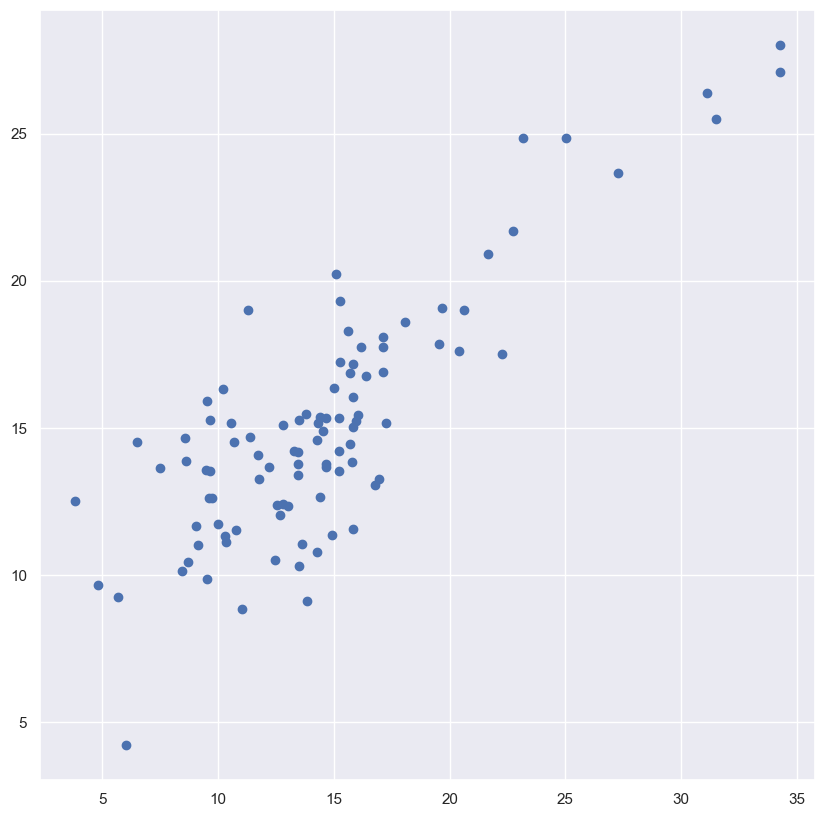

In [24]:

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
print("Оценка модели на тестовой выборке: ")
print('- среднеквадратическая ошибка {}'.format(rmse))
print('- коэффициент детерминации {}'.format(r2))
plt.scatter(Y_test, y_test_predict)
plt.show()

